# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv("911.csv")

**Checking the info() of the df**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Exploratory Analysis

**The Top 5 Zipcodes for 911 calls**

In [8]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**The top 5 townships (twp) for 911 calls**

In [9]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Investigting the unique codes in the 'title' column**

In [10]:
df['title'].nunique()

110

## Creating new features

**Creating a new column called Reasons and extracting the reasons from the title using the apply and split method** 


In [13]:
df['Reason'] = df['title'].apply(lambda t: t.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [18]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Creating a countplot based on Reasons**

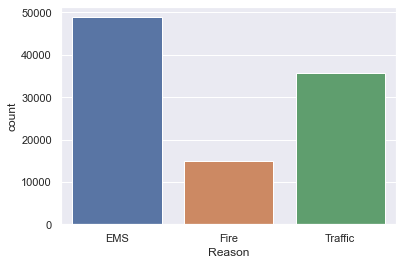

In [132]:
sns.set(style="darkgrid")
sns.countplot(x="Reason", data = df )

___
**Investigating time informaiton**

In [21]:
df['timeStamp'].dtypes

dtype('O')

**Converting the timeStamp column into a datetime data type to extract further information**

In [31]:
 df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Extracting the hour,month and day from the timeStamp column**

In [33]:
df['Hour'] = df['timeStamp'].apply(lambda t: t.hour)
df['Month'] = df['timeStamp'].apply(lambda t : t.month)
df['Day'] =  df['timeStamp'].apply(lambda t : t.dayofweek )

In [34]:
df['Day']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day, Length: 99492, dtype: int64

**Mapping the days of the week to their respective string names using the .map() method**

In [35]:
df['Name of Day'] = df['Day'].map( {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

**Creatign a countplot for the days of the week with the hue based on the reasons**

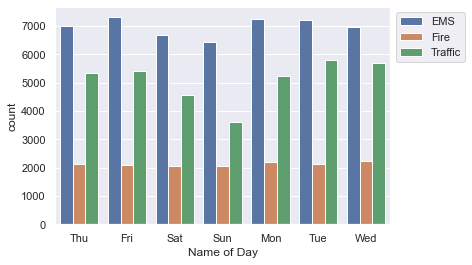

In [131]:
sns.countplot(x='Name of Day',hue='Reason',data = df)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

**Countplot based on the Months and hue based on the reasons**

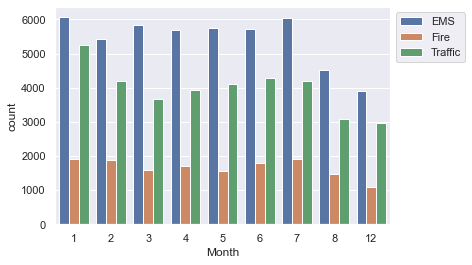

In [37]:
sns.countplot(x='Month',hue='Reason',data = df)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

Since some month values are missing the previous countplot, **we created a gropuby object called byMonth**

In [38]:
by_month = df.groupby('Month').count()
by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Name of Day
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


**Creating a simple plot off of the dataframe indicating the count of calls per month.**

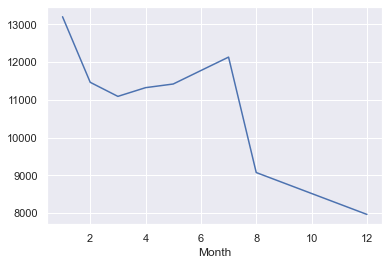

In [39]:
by_month['twp'].plot()

**Creating a seaborn's lmplot() to create a linear fit on the number of calls per month.**

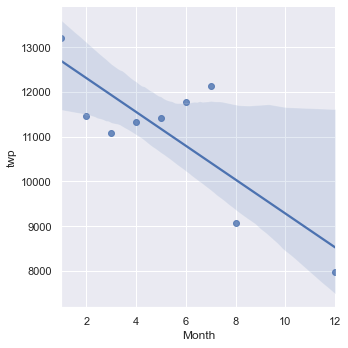

In [40]:
sns.lmplot('Month','twp',by_month.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.**

In [90]:
import calendar
df['Date'] = df['timeStamp'].apply(lambda  t: t.date())
df['Date']

**Using groupby with the count() aggregate to create a plot of counts of 911 calls.**

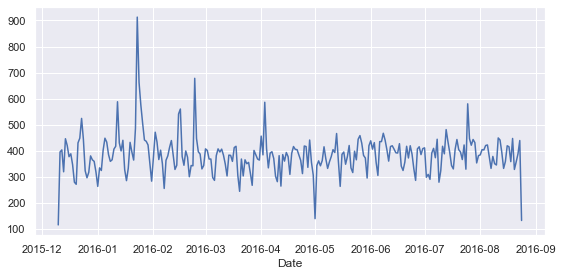

In [93]:
dates = df.groupby('Date').count()
dates['twp'].plot(figsize=(8,4))
plt.tight_layout()

**Recreating the previous plot but with each plot representing a Reason for the 911 call**

TimeStamp line plot representing reason = Traffic

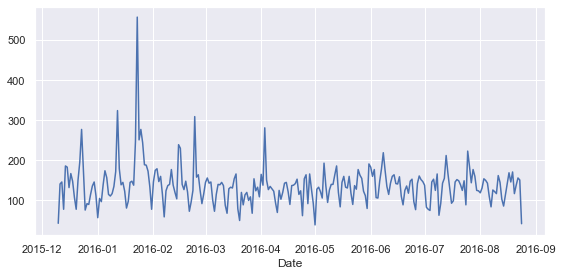

In [112]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot(figsize=(8,4))
plt.tight_layout()

TimeStamp line plot representing reason = Fire

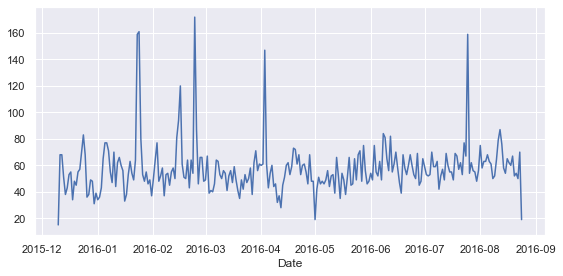

In [113]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot(figsize=(8,4))
plt.tight_layout()

TimeStamp line plot representing reason = EMS

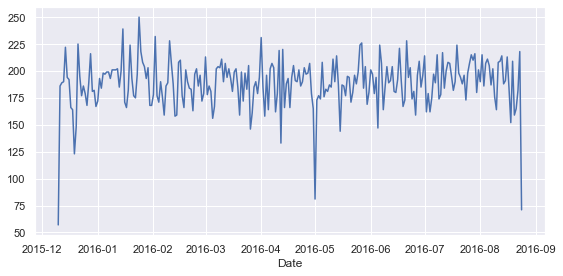

In [114]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot(figsize=(8,4))
plt.tight_layout()

### Further Exploratory Analysis

In [122]:
GHD = df.groupby(['Name of Day','Hour']).count()['Reason'].unstack()

**creating a HeatMap using this new DataFrame.**

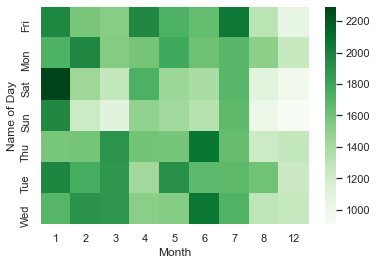

In [135]:
sns.heatmap(GHD,cmap='Greens')

**creating a clustermap using this DataFrame**

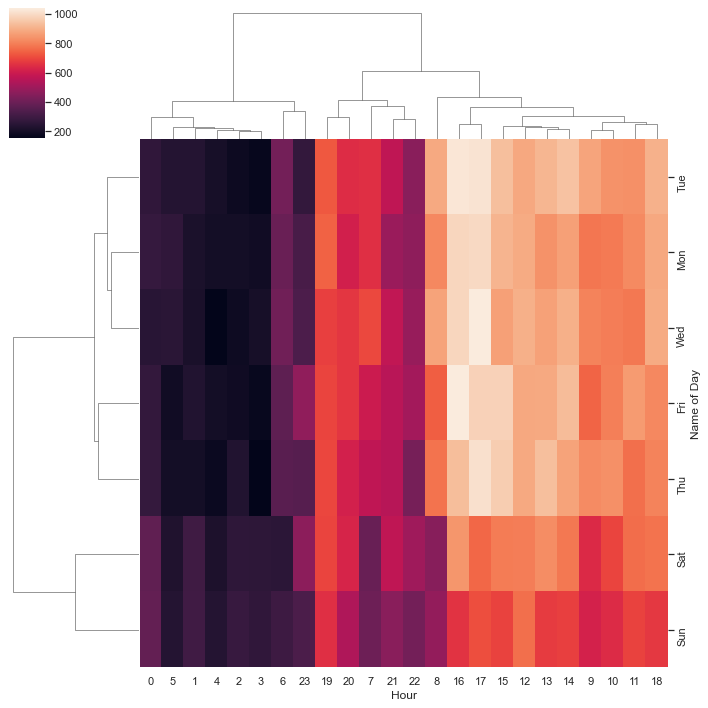

In [124]:
sns.clustermap(GHD)

**The same plots and operations, for a DataFrame that shows the Month as the column**

In [125]:
GHD = df.groupby(['Name of Day','Month']).count()['Reason'].unstack()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


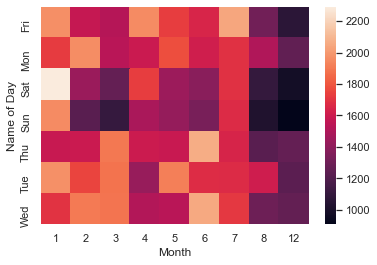

In [126]:
sns.heatmap(GHD)

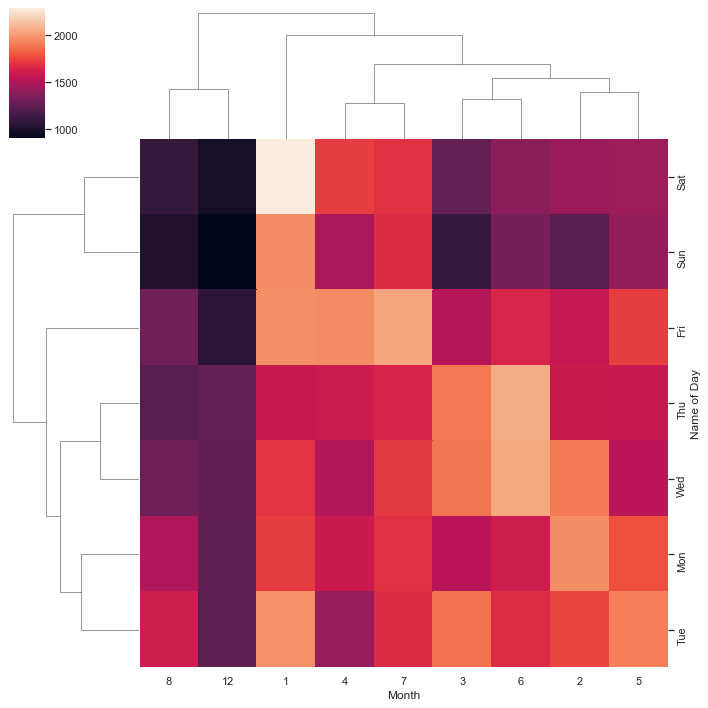

In [127]:
sns.clustermap(GHD)